In [1]:
import pandas as pd

In [2]:
CCTV_Seoul = pd.read_csv('data/CCTV_in_Seoul.csv')

In [5]:
CCTV_Seoul.head(10)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613
5,광진구,878,573,78,53,174
6,구로구,1884,1142,173,246,323
7,금천구,1348,674,51,269,354
8,노원구,1566,542,57,451,516
9,도봉구,825,238,159,42,386


In [7]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [6]:
CCTV_Seoul['기관명']

0      강남구
1      강동구
2      강북구
3      강서구
4      관악구
5      광진구
6      구로구
7      금천구
8      노원구
9      도봉구
10    동대문구
11     동작구
12     마포구
13    서대문구
14     서초구
15     성동구
16     성북구
17     송파구
18     양천구
19    영등포구
20     용산구
21     은평구
22     종로구
23      중구
24     중랑구
Name: 기관명, dtype: object

In [52]:
pop_Seoul=pd.read_excel('data/population_in_Seoul.xls', header=2, usecols='B, D, G, J, N', encoding='utf-8')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10158411.0,9891448.0,266963.0,1353486.0
1,종로구,164640.0,155109.0,9531.0,26034.0
2,중구,134174.0,125332.0,8842.0,21249.0
3,용산구,243922.0,228960.0,14962.0,36727.0
4,성동구,312933.0,304879.0,8054.0,40902.0


In [10]:
pop_Seoul.columns=['구별','인구수','한국인','외국인','고령자']

In [11]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10158411.0,9891448.0,266963.0,1353486.0
1,종로구,164640.0,155109.0,9531.0,26034.0
2,중구,134174.0,125332.0,8842.0,21249.0
3,용산구,243922.0,228960.0,14962.0,36727.0
4,성동구,312933.0,304879.0,8054.0,40902.0


# CCTV 데이터 파악하기

In [14]:
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780


In [15]:
CCTV_Seoul.sort_values(by='소계', ascending=True).head(5)

,기관명,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
9,도봉구,825,238,159,42,386,246.638655
2,강북구,831,369,120,138,204,125.203252
5,광진구,878,573,78,53,174,53.228621
3,강서구,911,388,258,184,81,134.793814
24,중랑구,916,509,121,177,109,79.960707


In [16]:
CCTV_Seoul.sort_values(by='소계', ascending=False).head(5)

,기관명,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
18,양천구,2482,1843,142,30,467,34.671731
14,서초구,2297,1406,157,336,398,63.371266
4,관악구,2109,846,260,390,613,149.290780
21,은평구,2108,1138,224,278,468,85.237258


In [13]:
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + \
                        CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전']  * 100
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(5)

,기관명,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


# # 서울시 인구 데이터 파악하기

In [17]:
pop_Seoul['구별'].unique()

array(['합계', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan], dtype=object)

In [29]:
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164640.0,155109.0,9531.0,26034.0,5.788994,15.812682
2,중구,134174.0,125332.0,8842.0,21249.0,6.589950,15.836898
3,용산구,243922.0,228960.0,14962.0,36727.0,6.133928,15.056862
4,성동구,312933.0,304879.0,8054.0,40902.0,2.573714,13.070529
5,광진구,372414.0,357743.0,14671.0,43579.0,3.939433,11.701762


In [83]:
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
pop_Seoul.drop([26], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,10158411.0,9891448.0,266963.0,1353486.0,2.628000,13.323796
1,종로구,164640.0,155109.0,9531.0,26034.0,5.788994,15.812682
2,중구,134174.0,125332.0,8842.0,21249.0,6.589950,15.836898
3,용산구,243922.0,228960.0,14962.0,36727.0,6.133928,15.056862
4,성동구,312933.0,304879.0,8054.0,40902.0,2.573714,13.070529


In [85]:
#'외국인'을 기준으로 오름차순 정렬
pop_Seoul.sort_values(by='외국인', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,10158411.0,9891448.0,266963.0,1353486.0,2.628000,13.323796
19,영등포구,401908.0,368818.0,33090.0,53620.0,8.233228,13.341362
17,구로구,443288.0,412972.0,30316.0,58260.0,6.838895,13.142697
18,금천구,253646.0,235608.0,18038.0,33818.0,7.111486,13.332755
21,관악구,522849.0,505188.0,17661.0,69486.0,3.377839,13.289879


In [86]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,10158411.0,9891448.0,266963.0,1353486.0,2.628000,13.323796
1,종로구,164640.0,155109.0,9531.0,26034.0,5.788994,15.812682
2,중구,134174.0,125332.0,8842.0,21249.0,6.589950,15.836898
3,용산구,243922.0,228960.0,14962.0,36727.0,6.133928,15.056862
4,성동구,312933.0,304879.0,8054.0,40902.0,2.573714,13.070529


In [87]:
pop_Seoul.sort_values(by='외국인비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,401908.0,368818.0,33090.0,53620.0,8.233228,13.341362
18,금천구,253646.0,235608.0,18038.0,33818.0,7.111486,13.332755
17,구로구,443288.0,412972.0,30316.0,58260.0,6.838895,13.142697
2,중구,134174.0,125332.0,8842.0,21249.0,6.589950,15.836898
3,용산구,243922.0,228960.0,14962.0,36727.0,6.133928,15.056862


In [88]:
pop_Seoul.sort_values(by='인구수', ascending=False).head(10)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,10158411.0,9891448.0,266963.0,1353486.0,2.628000,13.323796
24,송파구,668366.0,661750.0,6616.0,75301.0,0.989877,11.266432
16,강서구,607877.0,601391.0,6486.0,75046.0,1.066992,12.345590
23,강남구,565731.0,560827.0,4904.0,64579.0,0.866843,11.415143
11,노원구,562278.0,558432.0,3846.0,73588.0,0.684003,13.087476
21,관악구,522849.0,505188.0,17661.0,69486.0,3.377839,13.289879
12,은평구,491899.0,487507.0,4392.0,73850.0,0.892866,15.013245
15,양천구,476627.0,472730.0,3897.0,54598.0,0.817620,11.455079
8,성북구,458261.0,446457.0,11804.0,65937.0,2.575825,14.388525
22,서초구,447177.0,442833.0,4344.0,52738.0,0.971427,11.793540


# # Pandas 고급 두 DataFeame 병합하기

#### CCTV_seoul

In [123]:
CCTV_Seoul = pd.read_csv('data/CCTV_in_Seoul.csv')

In [124]:
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [125]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


#### pop_seoul

In [127]:
pop_Seoul=pd.read_excel('data/population_in_Seoul.xls', header=2, usecols='B, D, G, J, N', encoding='utf-8')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10158411.0,9891448.0,266963.0,1353486.0
1,종로구,164640.0,155109.0,9531.0,26034.0
2,중구,134174.0,125332.0,8842.0,21249.0
3,용산구,243922.0,228960.0,14962.0,36727.0
4,성동구,312933.0,304879.0,8054.0,40902.0


##### 합계 없애기

In [120]:
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
1,종로구,164640.0,155109.0,9531.0,26034.0
2,중구,134174.0,125332.0,8842.0,21249.0
3,용산구,243922.0,228960.0,14962.0,36727.0
4,성동구,312933.0,304879.0,8054.0,40902.0
5,광진구,372414.0,357743.0,14671.0,43579.0


In [121]:
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
1,종로구,164640.0,155109.0,9531.0,26034.0
2,중구,134174.0,125332.0,8842.0,21249.0
3,용산구,243922.0,228960.0,14962.0,36727.0
4,성동구,312933.0,304879.0,8054.0,40902.0
5,광진구,372414.0,357743.0,14671.0,43579.0


##### 외국인 및 고령자 비율 만들기

In [128]:
pop_Seoul.columns=['구별','인구수','한국인','외국인','고령자']

In [129]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,10158411.0,9891448.0,266963.0,1353486.0,2.628000,13.323796
1,종로구,164640.0,155109.0,9531.0,26034.0,5.788994,15.812682
2,중구,134174.0,125332.0,8842.0,21249.0,6.589950,15.836898
3,용산구,243922.0,228960.0,14962.0,36727.0,6.133928,15.056862
4,성동구,312933.0,304879.0,8054.0,40902.0,2.573714,13.070529


In [130]:
pop_Seoul['구별']

0       합계
1      종로구
2       중구
3      용산구
4      성동구
5      광진구
6     동대문구
7      중랑구
8      성북구
9      강북구
10     도봉구
11     노원구
12     은평구
13    서대문구
14     마포구
15     양천구
16     강서구
17     구로구
18     금천구
19    영등포구
20     동작구
21     관악구
22     서초구
23     강남구
24     송파구
25     강동구
26     NaN
Name: 구별, dtype: object

#### data merge

In [131]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,565731.0,560827.0,4904.0,64579.0,0.866843,11.415143
1,강동구,1010,379,99,155,377,446760.0,442654.0,4106.0,55902.0,0.919062,12.512759
2,강북구,831,369,120,138,204,329042.0,325552.0,3490.0,56078.0,1.060655,17.042809
3,강서구,911,388,258,184,81,607877.0,601391.0,6486.0,75046.0,1.066992,12.345590
4,관악구,2109,846,260,390,613,522849.0,505188.0,17661.0,69486.0,3.377839,13.289879


#### 필요없는 컬럼 제거

In [132]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,565731.0,560827.0,4904.0,64579.0,0.866843,11.415143
1,강동구,1010,446760.0,442654.0,4106.0,55902.0,0.919062,12.512759
2,강북구,831,329042.0,325552.0,3490.0,56078.0,1.060655,17.042809
3,강서구,911,607877.0,601391.0,6486.0,75046.0,1.066992,12.345590
4,관악구,2109,522849.0,505188.0,17661.0,69486.0,3.377839,13.289879


#### index 맞추기 : '구별'

In [133]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,
강남구,3238,565731.0,560827.0,4904.0,64579.0,0.866843,11.415143
강동구,1010,446760.0,442654.0,4106.0,55902.0,0.919062,12.512759
강북구,831,329042.0,325552.0,3490.0,56078.0,1.060655,17.042809
강서구,911,607877.0,601391.0,6486.0,75046.0,1.066992,12.345590
관악구,2109,522849.0,505188.0,17661.0,69486.0,3.377839,13.289879


In [134]:
import numpy as np

In [135]:
np.corrcoef(data_result['고령자비율'],data_result['소계'])

array([[ 1.        , -0.26753359],
       [-0.26753359,  1.        ]])

In [136]:
np.corrcoef(data_result['외국인비율'],data_result['소계'])

array([[ 1.        , -0.04728859],
       [-0.04728859,  1.        ]])

In [137]:
np.corrcoef(data_result['인구수'],data_result['소계'])

array([[ 1.        ,  0.23603622],
       [ 0.23603622,  1.        ]])

In [138]:
data_result.sort_values(by='소계', ascending=False).head(5)

,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,
강남구,3238,565731.0,560827.0,4904.0,64579.0,0.866843,11.415143
양천구,2482,476627.0,472730.0,3897.0,54598.0,0.817620,11.455079
서초구,2297,447177.0,442833.0,4344.0,52738.0,0.971427,11.793540
관악구,2109,522849.0,505188.0,17661.0,69486.0,3.377839,13.289879
은평구,2108,491899.0,487507.0,4392.0,73850.0,0.892866,15.013245


# # CCTV와 인구현황 그래프로 분석하기

In [139]:
import matplotlib.pyplot as plt
%matplotlib inline

In [140]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [141]:
data_result.head()

,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,
강남구,3238,565731.0,560827.0,4904.0,64579.0,0.866843,11.415143
강동구,1010,446760.0,442654.0,4106.0,55902.0,0.919062,12.512759
강북구,831,329042.0,325552.0,3490.0,56078.0,1.060655,17.042809
강서구,911,607877.0,601391.0,6486.0,75046.0,1.066992,12.345590
관악구,2109,522849.0,505188.0,17661.0,69486.0,3.377839,13.289879


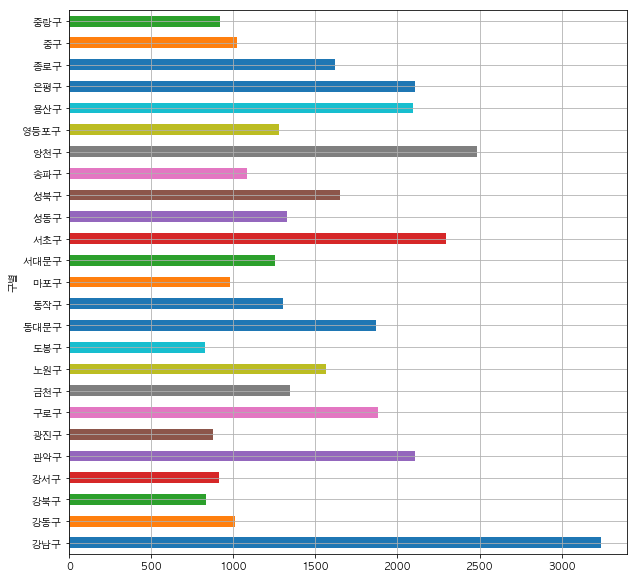

In [142]:
plt.figure()
data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

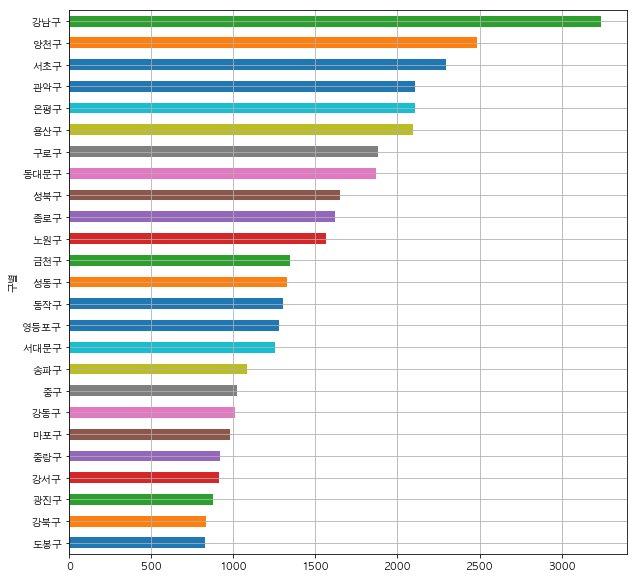

In [143]:
data_result['소계'].sort_values().plot(kind='barh', 
                                     grid=True, figsize=(10,10))
plt.show()

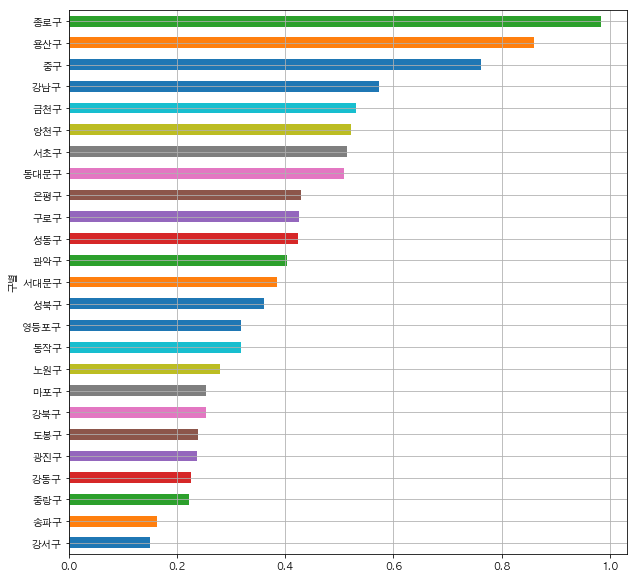

In [144]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100

data_result['CCTV비율'].sort_values().plot(kind='barh', 
                                         grid=True, figsize=(10,10))
plt.show()

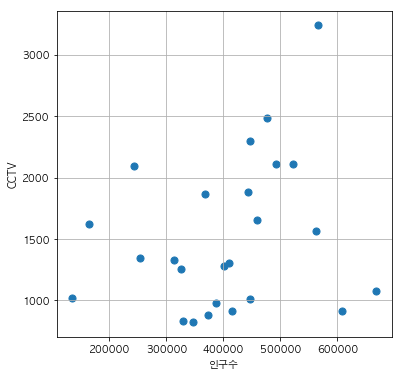

In [145]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [146]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([  1.12481497e-03,   1.05826669e+03])

In [147]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

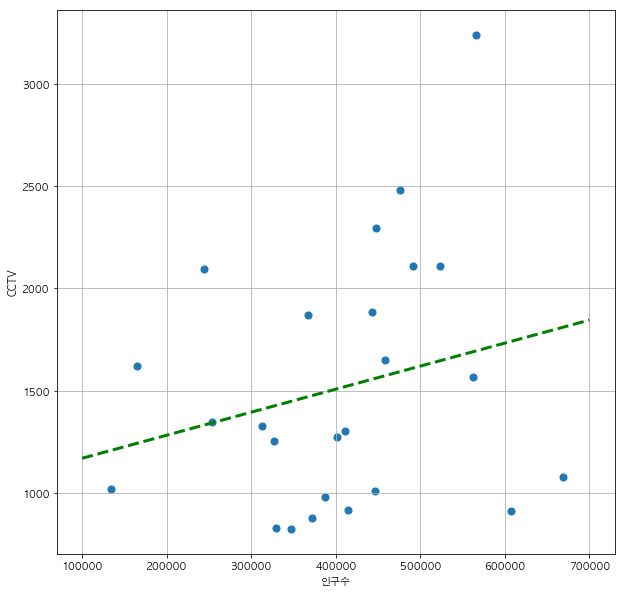

In [148]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

# # 조금 더 설득력 있는 자료 만들기

In [149]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,
강남구,3238,565731.0,560827.0,4904.0,64579.0,0.866843,11.415143,0.572357,1543.390613
양천구,2482,476627.0,472730.0,3897.0,54598.0,0.817620,11.455079,0.520743,887.616126
강서구,911,607877.0,601391.0,6486.0,75046.0,1.066992,12.345590,0.149866,831.015839
용산구,2096,243922.0,228960.0,14962.0,36727.0,6.133928,15.056862,0.859291,763.366194
서초구,2297,447177.0,442833.0,4344.0,52738.0,0.971427,11.793540,0.513667,735.741927


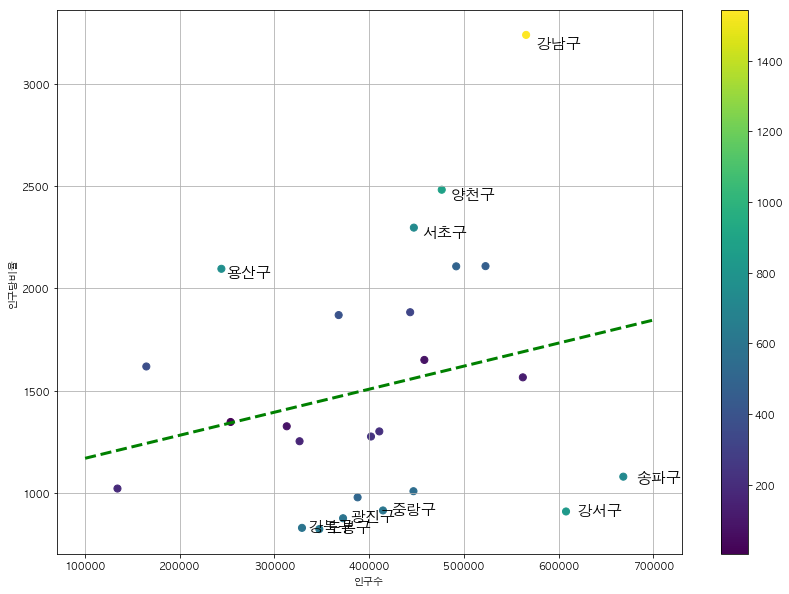

In [150]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'], 
            c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, 
             df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()

* 서울시에서 다른 구와 비교했을 때, 강남구, 양천구, 서초구, 은평구는 CCTV가 많지만,
* 송파구, 강서구, 도봉구, 마포구는 다른 구에 비해 CCTV 비율이 낮다

# # Custom

In [151]:
data_result.head()

,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,
강남구,3238,565731.0,560827.0,4904.0,64579.0,0.866843,11.415143,0.572357,1543.390613
강동구,1010,446760.0,442654.0,4106.0,55902.0,0.919062,12.512759,0.226072,550.789025
강북구,831,329042.0,325552.0,3490.0,56078.0,1.060655,17.042809,0.252551,597.378057
강서구,911,607877.0,601391.0,6486.0,75046.0,1.066992,12.345590,0.149866,831.015839
관악구,2109,522849.0,505188.0,17661.0,69486.0,3.377839,13.289879,0.403367,462.624928


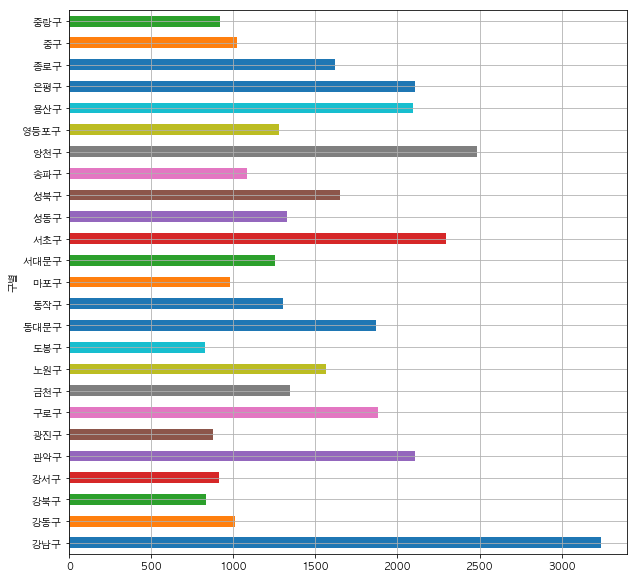

In [152]:
plt.figure()
data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

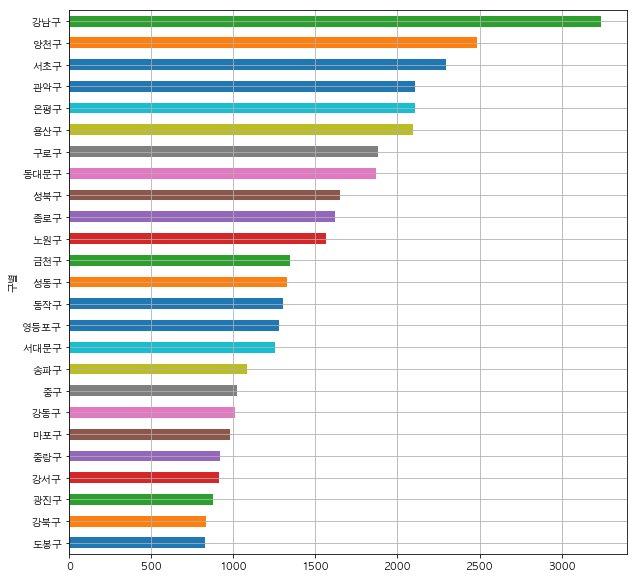

In [153]:
data_result['소계'].sort_values().plot(kind='barh', 
                                     grid=True, figsize=(10,10))
plt.show()

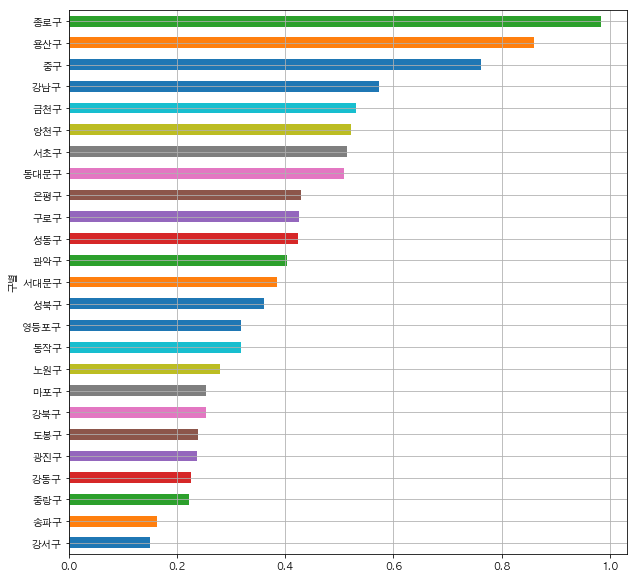

In [154]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100

data_result['CCTV비율'].sort_values().plot(kind='barh', 
                                         grid=True, figsize=(10,10))
plt.show()

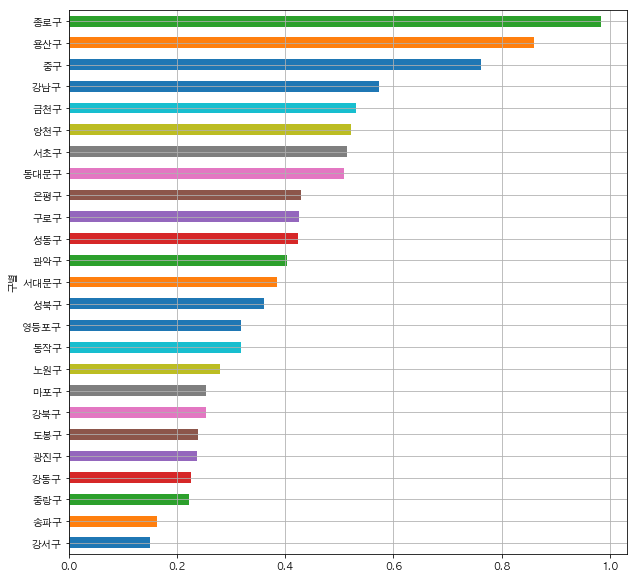

In [156]:
data_result['CCTV비율'].sort_values().plot(kind='barh', 
                                         grid=True, figsize=(10,10))
plt.show()

In [161]:
data_result.head()

,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,
강남구,3238,565731.0,560827.0,4904.0,64579.0,0.866843,11.415143,0.572357,1543.390613
강동구,1010,446760.0,442654.0,4106.0,55902.0,0.919062,12.512759,0.226072,550.789025
강북구,831,329042.0,325552.0,3490.0,56078.0,1.060655,17.042809,0.252551,597.378057
강서구,911,607877.0,601391.0,6486.0,75046.0,1.066992,12.345590,0.149866,831.015839
관악구,2109,522849.0,505188.0,17661.0,69486.0,3.377839,13.289879,0.403367,462.624928


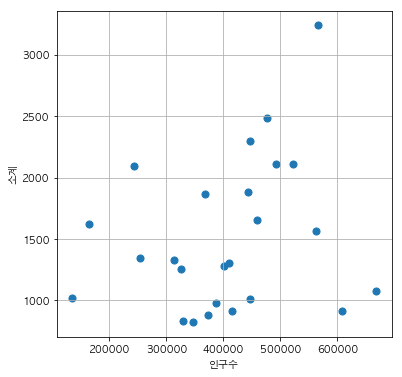

In [163]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('소계')
plt.grid()
plt.show()

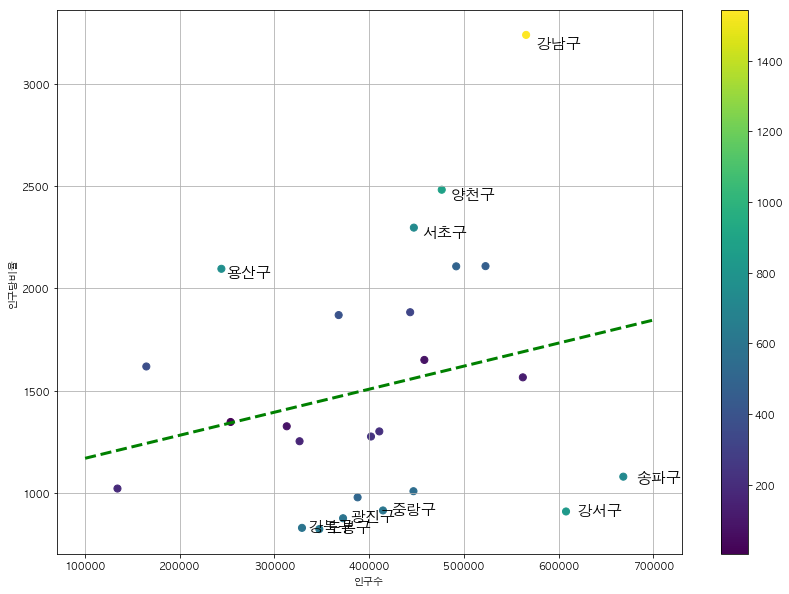

In [164]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'], 
            c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, 
             df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()